In [2]:
import re
import csv

t = open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv','r',encoding='latin-1')
csv_iter = csv.reader(t)
stupid_list = []
db = []
for row in csv_iter:
        db.append(row)
        stupid_list.append(row[4])


        

        

In [3]:
import psycopg2
conn = psycopg2.connect("postgresql://millbr02:@localhost/world")
curs = conn.cursor()
curs.execute("select * from country limit 400")
res = curs.fetchall()
stupid_dict1 = {}
for row in res:
    stupid_list.append(row[1])
print(stupid_list)



['name', 'Maldives', 'Finland', 'Niger', 'Uruguay', 'Zimbabwe', 'Philippines', 'Sudan', 'Russian Federation', 'China', 'Spain', 'Suriname', 'Argentina', 'El Salvador', 'Malaysia', 'Nepal', 'Portugal', 'Colombia', 'Belarus', 'Morocco', 'Saint Lucia', 'Egypt', 'Mexico', 'Belgium', 'Brunei', 'Rwanda', 'Canada', 'Albania', 'Greece', 'Saint Kitts and Nevis', 'Guyana', 'Liberia', 'Antigua and Barbuda', 'Mozambique', 'Japan', 'Democratic Yemen', 'Gabon', 'Bangladesh', 'Sweden', 'Turkey', 'Chad', 'Syria', 'Cameroon', 'Jamaica', 'Luxembourg', 'Italy', 'Angola', 'Costa Rica', 'Czechoslovakia', 'Burkina Faso', 'Mongolia', 'Bahrain', 'Haiti', 'Oman', 'CÃ´te dÂ\x92Ivoire', 'Togo', 'Cyprus', 'Mauritius', 'Myanmar', 'United Arab Emirates', 'Guatemala', 'Grenada', 'Libyan Arab Jamahiriya', 'Sri Lanka', 'Tanzania', 'Singapore', 'Norway', 'Laos', 'Iceland', 'Afghanistan', 'Chile', 'Dominica', 'Ukraine', 'Kenya', 'Belize', 'France', 'Mali', 'Saint Vincent and the Grenadines', 'Venezuela', 'Malta', 'Ghana

In [4]:
stupid_matrix = {x: {} for x in stupid_list}
for k in stupid_matrix:
    stupid_matrix[k] = {x:0 for x in stupid_list}
    
print(stupid_matrix)

{'Switzerland': {'Switzerland': 0, 'Malta': 0, 'Ethiopia': 0, 'Bhutan': 0, 'Guyana': 0, 'Algeria': 0, 'Mozambique': 0, 'Fiji Islands': 0, 'Netherlands Antilles': 0, 'Belgium': 0, 'Bosnia and Herzegovina': 0, 'Monaco': 0, 'Cambodia': 0, 'Denmark': 0, 'Ukraine': 0, 'French Guiana': 0, 'Brazil': 0, 'Pitcairn': 0, 'Bulgaria': 0, 'Netherlands': 0, 'Mongolia': 0, 'Philippines': 0, 'Angola': 0, 'Panama': 0, 'Qatar': 0, 'Mali': 0, 'Sierra Leone': 0, 'Réunion': 0, 'Equatorial Guinea': 0, 'name': 0, 'Croatia': 0, 'Seychelles': 0, 'South Africa': 0, 'Australia': 0, 'United States Minor Outlying Islands': 0, 'Slovakia': 0, 'San Marino': 0, 'Sudan': 0, 'Czechoslovakia': 0, 'Bolivia': 0, 'Côte d\x92Ivoire': 0, 'Germany': 0, 'China': 0, 'Sao Tome and Principe': 0, 'Congo': 0, 'United States': 0, 'Cyprus': 0, 'Argentina': 0, 'Guam': 0, 'Singapore': 0, 'Samoa': 0, 'Nigeria': 0, 'Luxembourg': 0, 'South Georgia and the South Sandwich Islands': 0, 'Central African Republic': 0, 'Laos': 0, 'Niue': 0, 'Paki

In [5]:
for row in db[1:]:
    speech = row[3]
    countryspeaking = row[4]
    for word in stupid_list:
        count = speech.count(word)
        stupid_matrix[countryspeaking][word] += count
#print(stupid_matrix)

        

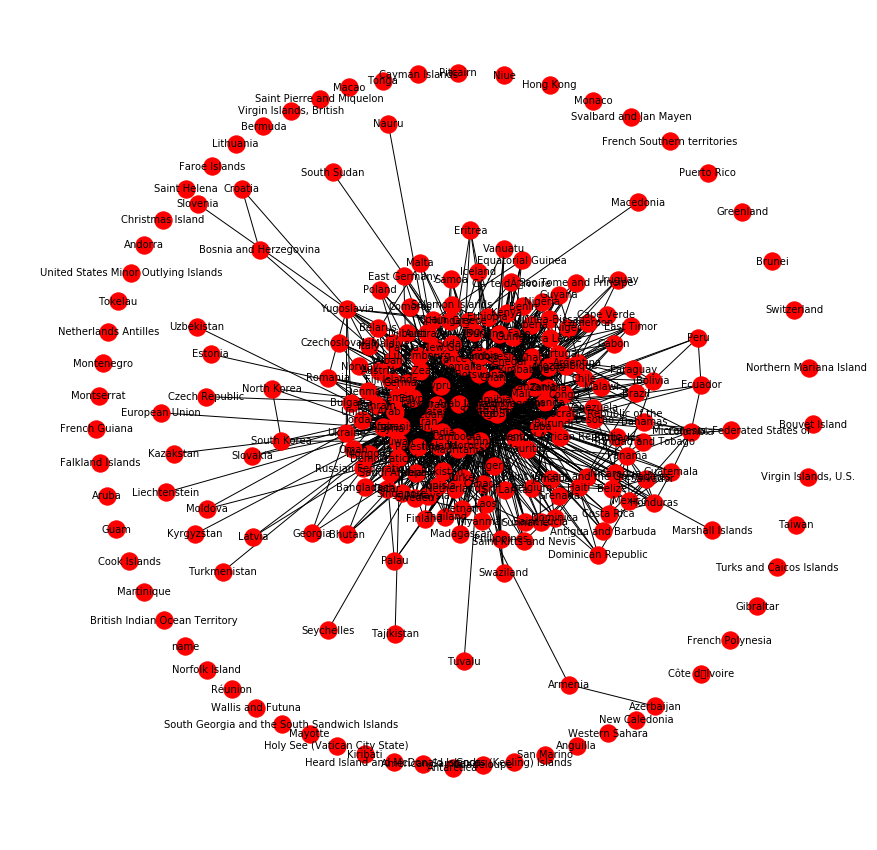

In [10]:
%matplotlib inline
import networkx as nx
import warnings
import matplotlib.pyplot as plt
gfig, gax = plt.subplots(figsize=(15,15))
warnings.filterwarnings('ignore')
g=nx.Graph()
g.add_nodes_from(stupid_matrix)
for key in stupid_matrix:
    for key2 in stupid_matrix[key]:
        if stupid_matrix[key][key2] > 1000:
            g.add_edge(key,key2)
            
            
pos=nx.spring_layout(g)
nx.draw(g,with_labels=True,font_size=10)

KeyError: 'Israel'

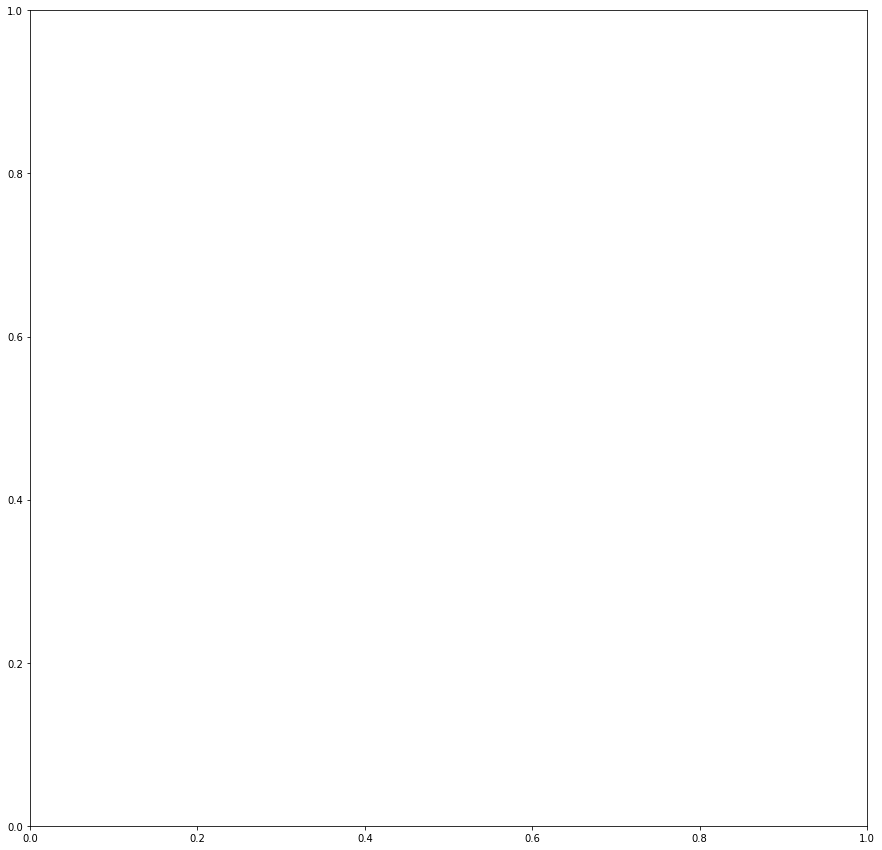

In [48]:
gfig, gax = plt.subplots(figsize=(15,15))
hego = nx.ego_graph(nx.Graph(), 'Israel', radius=2)
pos = nx.spring_layout(hego, k=20*2/math.sqrt(len(mat.index)), scale=8.0)
nx.draw(hego, pos, ax=gax, node_size = 1000, with_labels=True, font_size=18)